In [118]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [119]:
df = pd.read_csv("../data/mi_matched_precinct_use_this.csv")
df.columns


Index(['total_pop', 'pop_density', 'prop_white', 'prop_Black', 'prop_Hispanic',
       'prop_AIA', 'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_higher', 'prop_under_hs', 'prop_under_30k',
       'prop_30_to_50k', 'prop_50_to_100k', 'prop_more_than_100k',
       'D_pct_vote', 'Weighted_ideology'],
      dtype='object')

In [120]:
x = df.drop(['prop_white', 'prop_higher', 'D_pct_vote', 'Weighted_ideology'], axis=1)
y = df['D_pct_vote']
x.columns

Index(['total_pop', 'pop_density', 'prop_Black', 'prop_Hispanic', 'prop_AIA',
       'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_under_hs', 'prop_under_30k', 'prop_30_to_50k',
       'prop_50_to_100k', 'prop_more_than_100k'],
      dtype='object')

In [121]:
x.to_numpy()
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [122]:
lr = [.1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    acc = y_pred - y_test
    tot = acc.sum()
    accuracies[l] = tot
print("Most accurate learning rate is:", min(accuracies, key=accuracies.get))


Most accurate learning rate is: 0.25


Cumulative Predictive Difference in Accuracy 0.016849186913493214


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

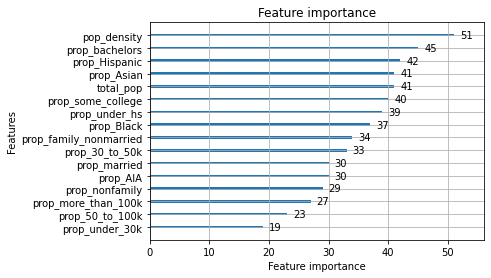

In [123]:
reg = lgb.LGBMRegressor(learning_rate=0.25)
reg.fit(X_train, y_train)
ydp_pred = reg.predict(X_test)
acc = ydp_pred - y_test
total_acc = acc.sum()
print("Cumulative Predictive Difference in Accuracy",total_acc)
lgb.plot_importance(reg)

In [124]:
y = df['Weighted_ideology']
x.to_numpy()
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [125]:
lr = [.1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    acc = y_pred - y_test
    tot = acc.sum()
    accuracies[l] = tot
print("Most accurate learning rate is:", min(accuracies, key=accuracies.get))

Most accurate learning rate is: 0.2


Cumulative Predictive Difference in Accuracy 0.010448164265819793


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

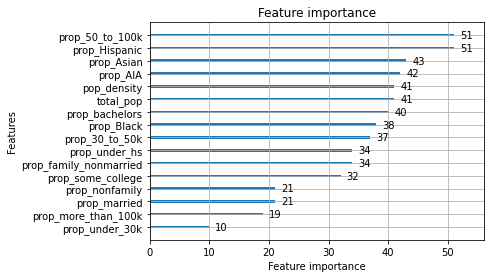

In [126]:
reg = lgb.LGBMRegressor(learning_rate=0.2)
reg.fit(X_train, y_train)
ydp_pred = reg.predict(X_test)
acc = ydp_pred - y_test
total_acc = acc.sum()
print("Cumulative Predictive Difference in Accuracy",total_acc)
lgb.plot_importance(reg)